In [31]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
df = pd.read_csv("exchange_rate.csv")

In [19]:
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], dayfirst=True, errors='coerce')
df = df.dropna().sort_values(df.columns[0])


In [20]:
series = df.set_index(df.columns[0])[df.columns[1]]

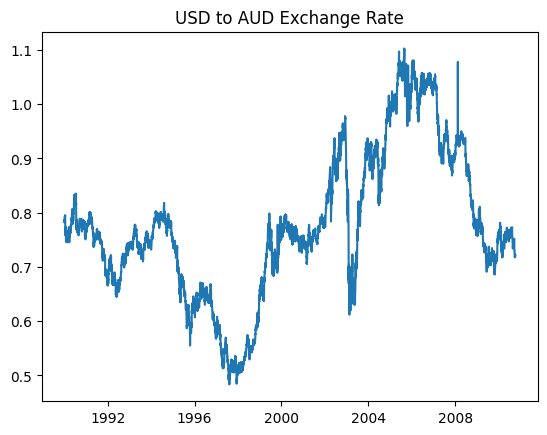

In [21]:
plt.plot(series); 
plt.title("USD to AUD Exchange Rate"); 
plt.show()

In [22]:
series = series.asfreq(pd.infer_freq(series.index) or None)
series = series.interpolate().bfill().ffill()
adf_p = adfuller(series)[1]
d = 0 if adf_p < 0.05 else 1

In [23]:
print("ADF p:", round(adf_p,4), " → d =", d)

ADF p: 0.4492  → d = 1


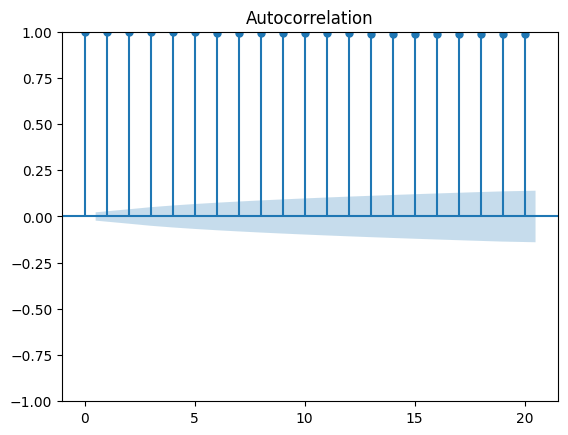

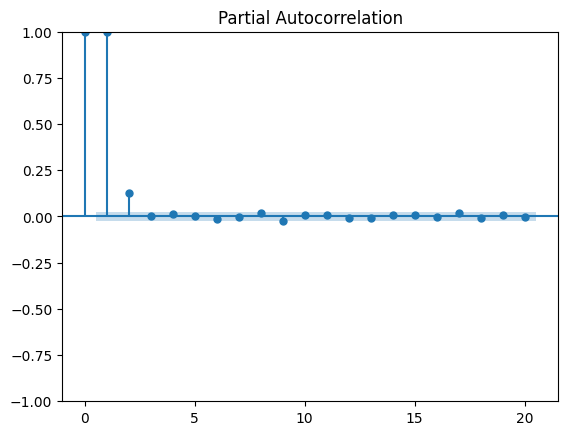

Using ARIMA( 1 , 1 , 1 )


In [24]:
plot_acf(series.dropna(), lags=20); plt.show()
plot_pacf(series.dropna(), lags=20, method='ywm'); plt.show()
p, q = 1, 1  # simple quick guess after looking at plots
print("Using ARIMA(",p,",",d,",",q,")")


In [25]:
h = int(0.2*len(series))
train, test = series[:-h], series[-h:]
ar = ARIMA(train, order=(p,d,q)).fit()
fc_ar = ar.forecast(len(test))



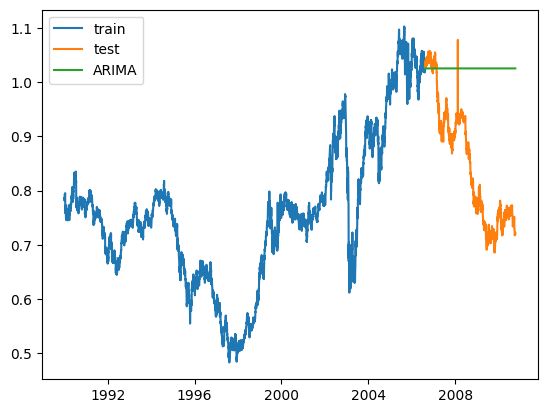

In [26]:
plt.plot(train, label='train'); plt.plot(test, label='test')
plt.plot(test.index, fc_ar, label='ARIMA')
plt.legend(); plt.show()

In [27]:
es = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
fc_es = es.forecast(len(test))



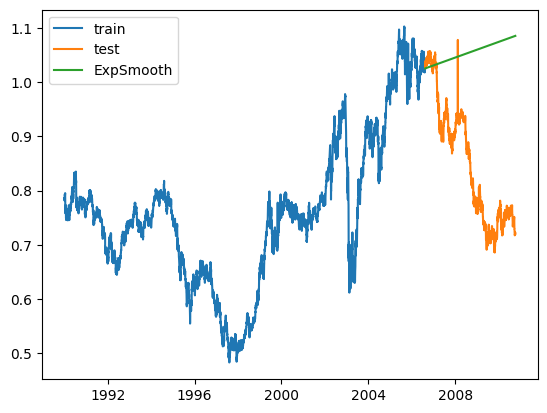

In [28]:
plt.plot(train, label='train'); plt.plot(test, label='test')
plt.plot(test.index, fc_es, label='ExpSmooth'); plt.legend(); plt.show()

In [29]:
def mape(a,b): return np.mean(np.abs((a-b)/a))*100

In [ ]:
ar_mae, es_mae = mean_absolute_error(test, fc_ar), mean_absolute_error(test, fc_es)
ar_rmse, es_rmse = mean_squared_error(test, fc_ar)**0.5, mean_squared_error(test, fc_es)**0.5
ar_mape, es_mape = mape(test, fc_ar), mape(test, fc_es)

In [36]:
print("ARIMA - MAE:",round(ar_mae,4)," RMSE:",round(ar_rmse,4)," MAPE:",round(ar_mape,2))
print("ExpSmooth - MAE:",round(es_mae,4)," RMSE:",round(es_rmse,4)," MAPE:",round(es_mape,2))

ARIMA - MAE: 0.179  RMSE: 0.2069  MAPE: 22.97
ExpSmooth - MAE: 0.2082  RMSE: 0.2408  MAPE: 26.72
